# IBM Developer Skills Network

# Multiple Input and OutPut Channels

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

# Multiple Output Channels

In Pytroch, you can create a <code>Conv2d</code> object with multiple outputs. For each channel, a kernel is created, and each kernel performs a convolution independently. As a result, the number of outputs is equal to the number of channels. This is demonstrated in the following figure. The number 9 is convolved with three kernels: each of a different color. There are three different activation maps represented by the different colors.


In [4]:
# create a conv object with 3 channels
conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3)

In [5]:
Gx=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])  # x kernel
Gy=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]]) # y kernel

conv1.state_dict()['weight'][0][0]=Gx
conv1.state_dict()['weight'][1][0]=Gy
conv1.state_dict()['weight'][2][0]=torch.ones(3,3)

In [6]:
# Print out each kernel
for x in conv1.state_dict()['weight']:
    print(x) 

tensor([[[ 1.,  0., -1.],
         [ 2.,  0., -2.],
         [ 1.,  0., -1.]]])
tensor([[[ 1.,  2.,  1.],
         [ 0.,  0.,  0.],
         [-1., -2., -1.]]])
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])


In [7]:
# Image
image = torch.zeros(1, 1, 5, 5)
image[0, 0, :, 2] = 1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

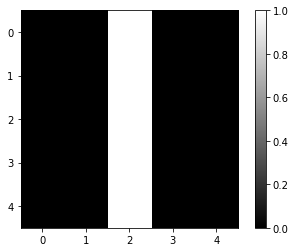

In [8]:
plt.imshow(image[0,0,:,:].numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()
plt.show()

In [9]:
# Perform convolution
out = conv1(image)

The result is a 1x3x3x3 tensor. This represents one sample with three channels, and each channel contains a 3x3 image.  The same rules that govern the shape of each image were discussed in the last section.


In [10]:
out.shape

torch.Size([1, 3, 3, 3])

tensor([[-4.1465, -0.1465,  3.8535],
        [-4.1465, -0.1465,  3.8535],
        [-4.1465, -0.1465,  3.8535]], grad_fn=<UnbindBackward>)


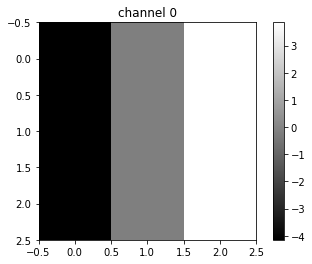

tensor([[0.2324, 0.2324, 0.2324],
        [0.2324, 0.2324, 0.2324],
        [0.2324, 0.2324, 0.2324]], grad_fn=<UnbindBackward>)


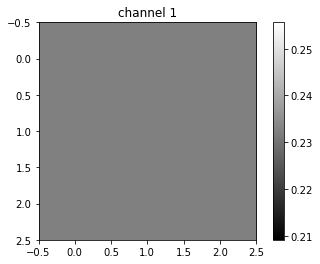

tensor([[3.2365, 3.2365, 3.2365],
        [3.2365, 3.2365, 3.2365],
        [3.2365, 3.2365, 3.2365]], grad_fn=<UnbindBackward>)


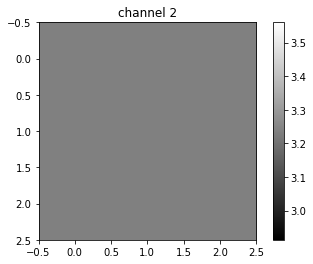

In [11]:
# Print each channel as image
for channel,image in enumerate(out[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

Different kernels can be used to detect various features in an image. You can see that the first channel fluctuates, and the second two channels produce a constant value. The following figure summarizes the process:


tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])


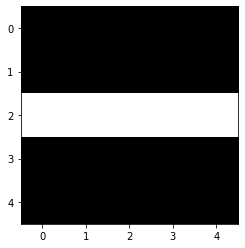

In [12]:
# The result will be different with different image
image1 = torch.zeros(1,1,5,5)
image1[0,0,2,:]=1
print(image1)
plt.imshow(image1[0,0,:,:].detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.show()

tensor([[-0.1465, -0.1465, -0.1465],
        [-0.1465, -0.1465, -0.1465],
        [-0.1465, -0.1465, -0.1465]], grad_fn=<UnbindBackward>)


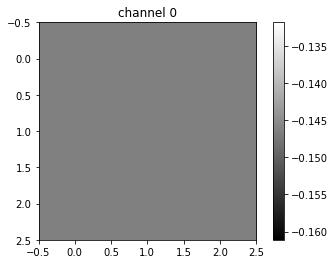

tensor([[-3.7676, -3.7676, -3.7676],
        [ 0.2324,  0.2324,  0.2324],
        [ 4.2324,  4.2324,  4.2324]], grad_fn=<UnbindBackward>)


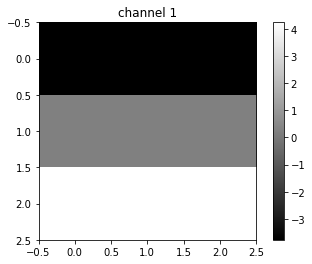

tensor([[3.2365, 3.2365, 3.2365],
        [3.2365, 3.2365, 3.2365],
        [3.2365, 3.2365, 3.2365]], grad_fn=<UnbindBackward>)


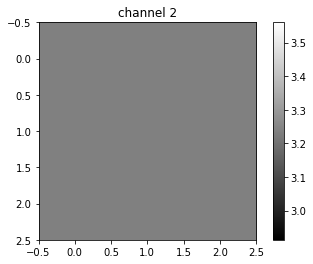

In [13]:
out1=conv1(image1)
for channel,image in enumerate(out1[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

# Multiple input channels

For two inputs, you can create two kernels. Each kernel performs a convolution on its associated input channel. The resulting output is added together as shown:  


In [14]:
# create an input with 2 channels
image2 = torch.zeros(1,2,5,5)
image2[0,0,2,:] = -2
image2[0,1,2,:] = 1

tensor([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [-2., -2., -2., -2., -2.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])


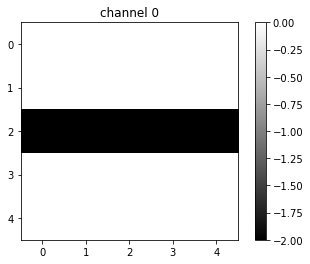

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


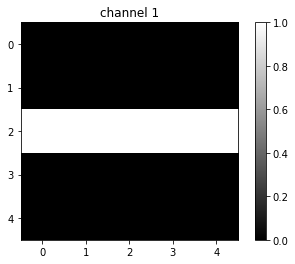

In [15]:
for channel,image in enumerate(image2[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

In [17]:
# Create conv object with 2 input
conv3 = nn.Conv2d(in_channels=2, out_channels=1, kernel_size = 3)

In [18]:
Gx1=torch.tensor([[0.0,0.0,0.0],[0,1.0,0],[0.0,0.0,0.0]])
conv3.state_dict()['weight'][0][0]=1*Gx1
conv3.state_dict()['weight'][0][1]=-2*Gx1
conv3.state_dict()['bias'][:]=torch.tensor([0.0])

In [19]:
conv3.state_dict()['weight']

tensor([[[[ 0.,  0.,  0.],
          [ 0.,  1.,  0.],
          [ 0.,  0.,  0.]],

         [[-0., -0., -0.],
          [-0., -2., -0.],
          [-0., -0., -0.]]]])

In [20]:
# Perform the convoluution
conv3(image2)

tensor([[[[ 0.,  0.,  0.],
          [-4., -4., -4.],
          [ 0.,  0.,  0.]]]], grad_fn=<ThnnConv2DBackward>)

# Multiple input and output channel

When using multiple inputs and outputs, a kernel is created for each input, and the process is repeated for each output. The process is summarized in the following image. 

There are two input channels and 3 output channels. For each channel, the input in red and purple is convolved with an individual kernel that is colored differently. As a result, there are three outputs. 


In [21]:
# example with 2 nputs 3 outputs

conv4 = nn.Conv2d(in_channels=2, out_channels=3,kernel_size=3)
conv4.state_dict()['weight'][0][0]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][0][1]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])


conv4.state_dict()['weight'][1][0]=torch.tensor([[0.0,0.0,0.0],[0,1,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][1][1]=torch.tensor([[0.0,0.0,0.0],[0,-1,0],[0.0,0.0,0.0]])

conv4.state_dict()['weight'][2][0]=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
conv4.state_dict()['weight'][2][1]=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

In [22]:
conv4.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


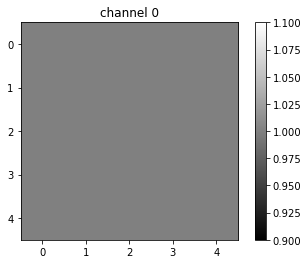

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


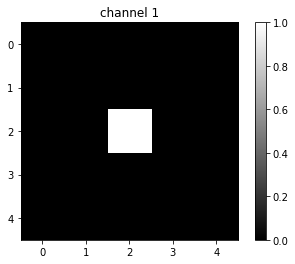

In [23]:
image4=torch.zeros(1,2,5,5)
image4[0][0]=torch.ones(5,5)
image4[0][1][2][2]=1
for channel,image in enumerate(image4[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

In [24]:
z = conv4(image4)

In [25]:
# Practice

imageA=torch.zeros(1,1,5,5)
imageB=torch.zeros(1,1,5,5)
imageA[0,0,2,:]=-2
imageB[0,0,2,:]=1


conv5 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
conv6 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)


Gx1=torch.tensor([[0.0,0.0,0.0],[0,1.0,0],[0.0,0.0,0.0]])
conv5.state_dict()['weight'][0][0]=1*Gx1
conv6.state_dict()['weight'][0][0]=-2*Gx1
conv5.state_dict()['bias'][:]=torch.tensor([0.0])
conv6.state_dict()['bias'][:]=torch.tensor([0.0])

In [26]:

conv5(imageA)+conv6(imageB)

tensor([[[[ 0.,  0.,  0.],
          [-4., -4., -4.],
          [ 0.,  0.,  0.]]]], grad_fn=<AddBackward0>)